# Parametric Study
A parametric study to explore a portion of the design space availble with existing material sizes
## Burst Pressure vs. Num Cells

[10, 0.365]
[10.5, 0.75]
[11, 0.5]
[11.5, 0.25]


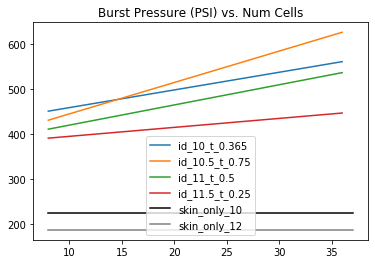

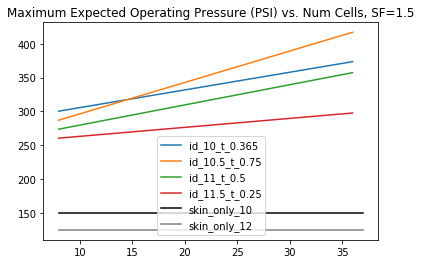

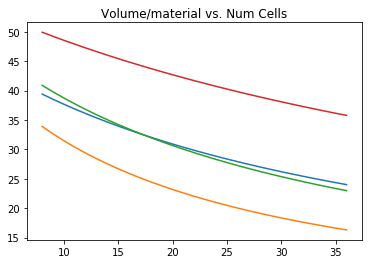

In [9]:
import math
import matplotlib.pyplot as plt


# Requirements
safety_factor = 1.5 # LV4 requirement 3.2.4.15

# Material properties 
E = 69.0 # Young's Modules, GPa for Al 6061-T6
E_imp = 10000*1000 # PSI
nu = 0.33 # Poisson's Ratio for Al 6061-T6
material_name = '6061-T6'
welded_tensile_strength = 24000 # psi
F_ty = 40 # ksi
F_tu = 45 # ksi

# Instability
c0 = 0.397    # 4.2.005
c1 = 10.2     # 4.2.006
c2 = 0.616    # 4.2.008

# Common Properties
skin_t = 0.05
rib_t = 0.05
flanges = False

# Parametric Space
raw_mat_options = [[10,0.365],[10.5,0.75],[11,0.5],[11.5,0.25]]
results = []
for tank in raw_mat_options:
    print(tank)
    tank_id = tank[0]
    tank_wall_t = tank[1]
    tank_od = tank_id+2*tank_wall_t
    tank_r = tank_od/2
    center_radius = (tank_od+tank_id)/4
    rib_depth = tank_wall_t - skin_t
    rel_weight_data = []
    p_burst_data = []
    volume_to_area = []
    num_cell_data = range(8,37)
    for num_radial_divisions in num_cell_data:
        pattern_size = tank_od*math.pi/num_radial_divisions
        cell_height = pattern_size
        alpha = (rib_t*rib_depth)/(skin_t*cell_height) # Web non-dimensional ratio, pg. 2.0.008
        delta = rib_depth/skin_t # rib depth to skin thickness ratio, pg. 2.0.008
        if flanges == False:
            beta = (3*alpha*(1+delta)**2+(1+alpha)*(1+alpha*delta**2))**0.5
            t_star = skin_t*beta/(1+alpha) # equivilent thickness, Eq. 2.5.3
            t_bar = skin_t*(1+3*alpha)
            E_star = E*(1+alpha)**2.0/beta # equivilent Young's Modulus Eq. 2.5.4#
            
        # Pressure
        N_cr_1 = c0*E_imp/1000*skin_t*skin_t/tank_r*beta
        N_cr_2 = c1*E_imp/1000*skin_t*(1+alpha)*(skin_t*skin_t)/(pattern_size*pattern_size)
        N_cr_3 = c2*E_imp/1000*skin_t*(1+alpha)*(rib_t*rib_t)/(rib_depth*rib_depth)
        p_burst = F_tu*1000*skin_t*(1+alpha)/tank_r
                                                                 
        #print('max pressure for unwelded ,', material_name, ': ',max_pressure, 'psi')
        cs_area = t_bar*2*math.pi*center_radius
        rel_weight_data.append(cs_area)
        p_burst_data.append(p_burst)
        #p_to_area.append(max_p/cs_area)
        volume_to_area.append((math.pi*tank_id*tank_id/4)/cs_area)
    results.append([tank_id, tank_wall_t, num_cell_data, rel_weight_data, p_burst_data, volume_to_area])

# Burst pressures
p_burst_skin_10 = F_tu*1000*skin_t/10
p_burst_skin_12 = F_tu*1000*skin_t/12
max_p_plot = plt.figure(1)
plt.title('Burst Pressure (PSI) vs. Num Cells')
for item in results:
    plt.plot(item[2], item[4],label='id_'+str(item[0])+'_t_'+str(item[1]))
plt.plot([8,37],[p_burst_skin_10,p_burst_skin_10],label='skin_only_10', color='black')
plt.plot([8,37],[p_burst_skin_12,p_burst_skin_12],label='skin_only_12', color='gray')
plt.legend()

# Operating pressures
max_p_plot = plt.figure(2)
plt.title('Maximum Expected Operating Pressure (PSI) vs. Num Cells, SF='+str(safety_factor))
for item in results:
    burst_p = item[4]
    op_p = []
    for p in burst_p:
        op_p.append(p/safety_factor)
    plt.plot(item[2], op_p,label='id_'+str(item[0])+'_t_'+str(item[1]))
plt.plot([8,37],[p_burst_skin_10/safety_factor,p_burst_skin_10/safety_factor],label='skin_only_10', color='black')
plt.plot([8,37],[p_burst_skin_12/safety_factor,p_burst_skin_12/safety_factor],label='skin_only_12', color='gray')
plt.legend()


# Volume Ratio
p_to_area_plot = plt.figure(3)
plt.title('Volume/material vs. Num Cells')
for item in results:
    plt.plot(item[2], item[5])

## Burst Pressure vs. Skin Thickness

[10, 0.365]
[10.5, 0.75]
[11, 0.5]
[11.5, 0.25]


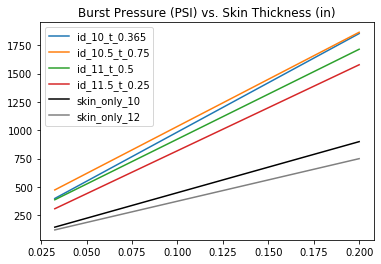

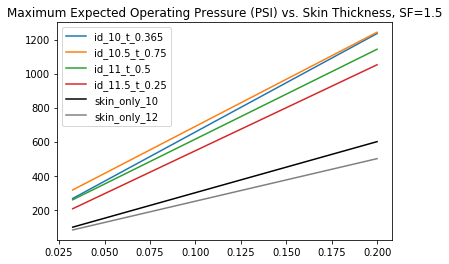

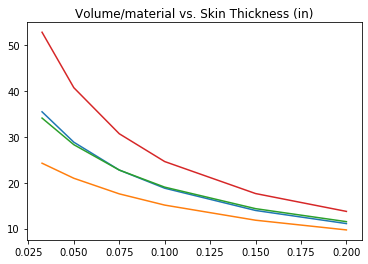

In [10]:
# Parametric Space
# reset results
skin_results = []
for tank in raw_mat_options:
    print(tank)
    tank_id = tank[0]
    tank_wall_t = tank[1]
    tank_od = tank_id+2*tank_wall_t
    tank_r = tank_id/2
    center_radius = (tank_od+tank_id)/4
    skin_thicknesses = [0.0325,0.05,0.075,0.1,0.15,0.2]
    rel_weight_data = []
    max_p_data = []
    volume_to_area = []
    num_cell_data = range(8,37)
    num_radial_divisions = 24
    for skin_t in skin_thicknesses:
        rib_depth = tank_wall_t - skin_t
        pattern_size = tank_od*math.pi/num_radial_divisions
        cell_height = pattern_size
        alpha = (rib_t*rib_depth)/(skin_t*cell_height) # Web non-dimensional ratio, pg. 2.0.008
        delta = rib_depth/skin_t # rib depth to skin thickness ratio, pg. 2.0.008
        if flanges == False:
            beta = (3*alpha*(1+delta)**2+(1+alpha)*(1+alpha*delta**2))**0.5
            t_star = skin_t*beta/(1+alpha) # equivilent thickness, Eq. 2.5.3
            t_bar = skin_t*(1+3*alpha)
            E_star = E*(1+alpha)**2.0/beta # equivilent Young's Modulus Eq. 2.5.4#
            
        # Pressure
        N_cr_1 = c0*E_imp/1000*skin_t*skin_t/tank_r*beta
        N_cr_2 = c1*E_imp/1000*skin_t*(1+alpha)*(skin_t*skin_t)/(pattern_size*pattern_size)
        N_cr_3 = c2*E_imp/1000*skin_t*(1+alpha)*(rib_t*rib_t)/(rib_depth*rib_depth)
        p_burst = F_tu*1000*skin_t*(1+alpha)/tank_r
        p_yield = F_ty*1000*skin_t*(1+alpha)/tank_r
                                                                 
        #print('max pressure for unwelded ,', material_name, ': ',max_pressure, 'psi')
        cs_area = t_bar*2*math.pi*center_radius
        rel_weight_data.append(cs_area)
        max_p_data.append(p_burst)
        #p_to_area.append(max_p/cs_area)
        volume_to_area.append((math.pi*tank_id*tank_id/4)/cs_area)
    skin_results.append([tank_id, tank_wall_t, skin_thicknesses, rel_weight_data, max_p_data, volume_to_area])

# Burst pressures
max_p_plot = plt.figure(4)
plt.title('Burst Pressure (PSI) vs. Skin Thickness (in)')
for item in skin_results:
    plt.plot(item[2], item[4],label='id_'+str(item[0])+'_t_'+str(item[1]))
p_burst_skin_10 = []
p_burst_skin_12 = []
for skin_t in skin_thicknesses:
    p_burst_skin_10.append(F_tu*1000*skin_t/10)
    p_burst_skin_12.append(F_tu*1000*skin_t/12)
plt.plot(skin_thicknesses,p_burst_skin_10,label='skin_only_10', color='black')
plt.plot(skin_thicknesses,p_burst_skin_12,label='skin_only_12', color='gray')
plt.legend()

# Operating pressures
max_p_plot = plt.figure(5)
plt.title('Maximum Expected Operating Pressure (PSI) vs. Skin Thickness, SF='+str(safety_factor))
for item in skin_results:
    burst_p = item[4]
    op_p = []
    for p in burst_p:
        op_p.append(p/safety_factor)
    plt.plot(item[2], op_p,label='id_'+str(item[0])+'_t_'+str(item[1]))
p_burst_skin_10 = []
p_burst_skin_12 = []
for skin_t in skin_thicknesses:
    p_burst_skin_10.append(F_tu*1000*skin_t/10/safety_factor)
    p_burst_skin_12.append(F_tu*1000*skin_t/12/safety_factor)
plt.plot(skin_thicknesses,p_burst_skin_10,label='skin_only_10', color='black')
plt.plot(skin_thicknesses,p_burst_skin_12,label='skin_only_12', color='gray')
plt.legend()

# Volume Ratio
p_to_area_plot = plt.figure(6)
plt.title('Volume/material vs. Skin Thickness (in)')
for item in skin_results:
    plt.plot(item[2], item[5])

## Burst Pressure vs. Rib Height

[10, 0.365]
[10.5, 0.75]
[11, 0.5]
[11.5, 0.25]


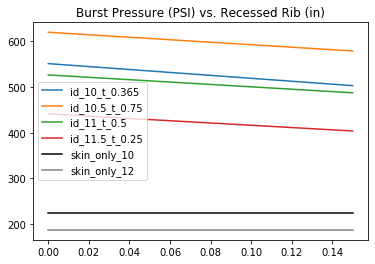

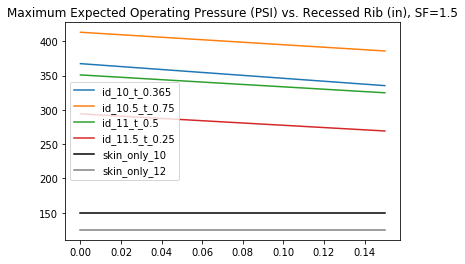

In [12]:
# Parametric Space
# reset results
rib_results = []
skin_t = 0.05
for tank in raw_mat_options:
    print(tank)
    tank_id = tank[0]
    tank_wall_t = tank[1]
    tank_od = tank_id+2*tank_wall_t
    tank_r = tank_id/2
    center_radius = (tank_od+tank_id)/4
    rib_deltas = [0.0, 0.02, 0.05, 0.1, 0.15]
    rel_weight_data = []
    max_p_data = []
    volume_to_area = []
    num_radial_divisions = 24
    for rib_delta in rib_deltas:
        rib_depth = tank_wall_t - skin_t - rib_delta
        pattern_size = tank_od*math.pi/num_radial_divisions
        cell_height = pattern_size
        alpha = (rib_t*rib_depth)/(skin_t*cell_height) # Web non-dimensional ratio, pg. 2.0.008
        delta = rib_depth/skin_t # rib depth to skin thickness ratio, pg. 2.0.008
        if flanges == False:
            beta = (3*alpha*(1+delta)**2+(1+alpha)*(1+alpha*delta**2))**0.5
            t_star = skin_t*beta/(1+alpha) # equivilent thickness, Eq. 2.5.3
            t_bar = skin_t*(1+3*alpha)        # Pressure
            E_star = E*(1+alpha)**2.0/beta # equivilent Young's Modulus Eq. 2.5.4#

        N_cr_1 = c0*E_imp/1000*skin_t*skin_t/tank_r*beta
        N_cr_2 = c1*E_imp/1000*skin_t*(1+alpha)*(skin_t*skin_t)/(pattern_size*pattern_size)
        N_cr_3 = c2*E_imp/1000*skin_t*(1+alpha)*(rib_t*rib_t)/(rib_depth*rib_depth)
        p_burst = F_tu*1000*skin_t*(1+alpha)/tank_r
        p_yield = F_ty*1000*skin_t*(1+alpha)/tank_r
                                                                 
        #print('max pressure for unwelded ,', material_name, ': ',max_pressure, 'psi')
        cs_area = t_bar*2*math.pi*center_radius
        rel_weight_data.append(cs_area)
        max_p_data.append(p_burst)
        #p_to_area.append(max_p/cs_area)
        volume_to_area.append((math.pi*tank_id*tank_id/4)/cs_area)
    rib_results.append([tank_id, tank_wall_t, rib_deltas, rel_weight_data, max_p_data, volume_to_area])

#print(rib_results)
# Burst pressures
max_p_plot = plt.figure(7)
plt.title('Burst Pressure (PSI) vs. Recessed Rib (in)')
for item in rib_results:
    plt.plot(item[2], item[4],label='id_'+str(item[0])+'_t_'+str(item[1]))
p_burst_skin_10 = []
p_burst_skin_12 = []
for rib_delta in rib_deltas:
    p_burst_skin_10.append(F_tu*1000*skin_t/10)
    p_burst_skin_12.append(F_tu*1000*skin_t/12)
plt.plot(rib_deltas,p_burst_skin_10,label='skin_only_10', color='black')
plt.plot(rib_deltas,p_burst_skin_12,label='skin_only_12', color='gray')
plt.legend()

# Operating pressures
max_p_plot = plt.figure(8)
plt.title('Maximum Expected Operating Pressure (PSI) vs. Recessed Rib (in), SF='+str(safety_factor))
for item in rib_results:
    burst_p = item[4]
    op_p = []
    for p in burst_p:
        op_p.append(p/safety_factor)
    plt.plot(item[2], op_p,label='id_'+str(item[0])+'_t_'+str(item[1]))
p_burst_skin_10 = []
p_burst_skin_12 = []
for rib_delta in rib_deltas:
    p_burst_skin_10.append(F_tu*1000*skin_t/10/safety_factor)
    p_burst_skin_12.append(F_tu*1000*skin_t/12/safety_factor)
plt.plot(rib_deltas,p_burst_skin_10,label='skin_only_10', color='black')
plt.plot(rib_deltas,p_burst_skin_12,label='skin_only_12', color='gray')
plt.legend()
            
            